In [937]:
import numpy as np
import matplotlib.pyplot as plt

In [938]:
# modelling the arrival process

# per second converyor belt

conveyor1=1
# c1 uses the distribution that tells us how likely the time of the next arrival
# a random value. 
conveyor2=2/3

stationFailrate=0.01
stationmean=1/stationFailrate

In [939]:
# Exponential Random Number Algorithm
def poisson_est(mean):
    r=np.exp(-mean)
    N=0.0
    s=1.0
    s*=np.random.random()
    while s>r:
        N+=1
        s*=np.random.random()
    else:
        return N

In [940]:
# total number of entities conveyor1 delivers per second for 1000 seconds
c1sample=[poisson_est(1)  for i in range(1000)]


In [941]:
# total entities conveyor belt delivers
totalc1=sum(c1sample)
totalc1

1031.0

In [942]:
def conveyor2(time):
    # number of entities conveyor2 delivers over a given time
    return (int(time/1.5))
conveyor2(1000)

666

In [943]:
def failtime(frate,time):
    # per unit time
    time=time%100
    # cdf of failure 
    c_fail=1 - np.exp(-frate* time)
    if(c_fail>=np.random.random()):
        return time
    else: 
        return 0    

In [944]:
def failnow(frate,time):
    # prob of failure in next second
    p_fail=frate*np.exp(-frate*0)+ frate*np.exp(-frate*1)

    if(p_fail>=np.random.random()):
        return time
    else: 
        return 0 

In [945]:
f=np.array([failnow(0.01,time) for time in range(10000)])
(10000-sum(f==0)) /10000
# failtime=
f[f!=0]

array([  18,   24,   30,  213,  253,  255,  256,  280,  305,  376,  423,
        424,  488,  524,  682,  715,  783,  790,  888,  915,  941, 1012,
       1064, 1089, 1111, 1135, 1238, 1331, 1489, 1491, 1613, 1630, 1711,
       1786, 1873, 1898, 2112, 2140, 2147, 2158, 2208, 2220, 2237, 2250,
       2297, 2454, 2530, 2562, 2578, 2633, 2732, 2748, 2772, 2818, 2824,
       2828, 2943, 2966, 3102, 3118, 3144, 3170, 3225, 3228, 3255, 3273,
       3380, 3394, 3399, 3446, 3540, 3582, 3584, 3602, 3656, 3689, 3708,
       3718, 3733, 3798, 3807, 3888, 4028, 4054, 4084, 4106, 4135, 4161,
       4168, 4204, 4214, 4243, 4245, 4265, 4310, 4393, 4413, 4437, 4453,
       4586, 4648, 4661, 4671, 4714, 4715, 4761, 4901, 4918, 5035, 5178,
       5185, 5248, 5283, 5334, 5433, 5527, 5530, 5575, 5578, 5600, 5663,
       5908, 6153, 6175, 6176, 6183, 6189, 6219, 6309, 6404, 6439, 6520,
       6563, 6580, 6628, 6710, 6742, 6753, 6760, 6857, 6870, 6886, 6891,
       6953, 6957, 6979, 6994, 7317, 7352, 7475, 74

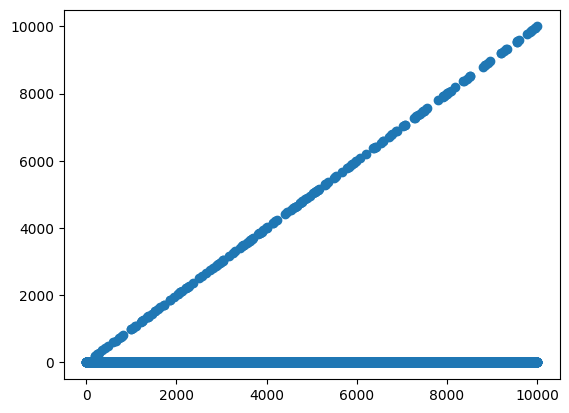

In [946]:
plt.scatter([time for time in range(10000)],[failnow(0.01,time) for time in range(10000)])